In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

In [36]:
from sklearn import preprocessing, metrics
import utils
import scipy.io
import numpy as np
from linear_classifier import LinearSVM_twoclass
import matplotlib.pyplot as plt
from sklearn.cross_validation import *

# load the SPAM email training dataset

X,y = utils.load_mat('data/spamTrain.mat')
yy = np.ones(y.shape)
yy[y==0] = -1

# load the SPAM email test dataset

test_data = scipy.io.loadmat('data/spamTest.mat')
X_test = test_data['Xtest']
y_test = test_data['ytest'].flatten()
yy_test = np.ones(y_test.shape)
yy_test[y_test==0] = -1

##################################################################################
#  YOUR CODE HERE for training the best performing SVM for the data above.       #
#  what should C be? What should num_iters be? Should X be scaled?               #
#  should X be kernelized? What should the learning rate be? What should the     #
#  number of iterations be?                                                      #
##################################################################################

svm = LinearSVM_twoclass()
svm.theta = np.zeros((X.shape[1],))
best_C = 0
best_sigma = 0
best_learning_rate = 0
best_test_acc = 0
best_svm = LinearSVM_twoclass()

Cs = [0.1, 0.3, 0,5, 1,2,3,4,5,10,20,50]
sigmas = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]
num_iters = [200, 500, 600, 700, 1000, 2000,5000, 10000]

length = len(Cs)*len(sigmas)*len(learning_rates)
score_train = np.zeros(length)
score_test = np.zeros(length)
C_matrix = np.zeros(length)
sig_matrix = np.zeros(length)
learning_rate_matrix = np.zeros(length)
count = 0

for sig in sigmas:
    K = metrics.pairwise.rbf_kernel(X,X,1/sig**2)
    K_test = metrics.pairwise.rbf_kernel(X_test,X,1/sig**2)

    # # scale the kernelized data matrix

    scaler = preprocessing.StandardScaler().fit(K)
    scaleK = scaler.transform(K)

    scaler = preprocessing.StandardScaler().fit(K_test)
    scaleK_test = scaler.transform(K_test)

    # add the intercept term

    KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
    KK_test = np.vstack([np.ones((scaleK_test.shape[0],)),scaleK_test.T]).T

    # transform y from [0,1] to [-1,1]

    yy = np.ones(y.shape)
    yy[y == 0] = -1

    # set up the SVM and learn the parameters

    svm.theta = np.zeros((KK.shape[1],))
    
    for C in Cs:
        for l in learning_rates:
            svm.train(KK,yy,learning_rate=l,reg=C,num_iters=2000,verbose=False)
            ac_train = metrics.accuracy_score(yy, svm.predict(KK))
            ac = metrics.accuracy_score(yy_test, svm.predict(KK_test))
            if(best_test_acc<ac):
                best_test_acc = ac
                best_svm = svm
                best_C = C
                best_sigma = sig
                best_learning_rate = l
            print ac_train, ac
            
            score_train[count] = ac_train
            score_test[count] = ac
            C_matrix[count] = C
            sig_matrix[count] = sig
            learning_rate_matrix[count] = l
            count += 1
    
##################################################################################
# YOUR CODE HERE for testing your best model's performance                       #
# what is the accuracy of your best model on the test set? On the training set?  #
##################################################################################

# convert X to kernel form with the kernel function

sigma = best_sigma

# compute the kernel (slow!)

K = metrics.pairwise.rbf_kernel(X,X,1/sigma**2)
K_test = metrics.pairwise.rbf_kernel(X_test,X,1/sigma**2)

# # scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

scaler = preprocessing.StandardScaler().fit(K_test)
scaleK_test = scaler.transform(K_test)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
KK_test = np.vstack([np.ones((scaleK_test.shape[0],)),scaleK_test.T]).T

# transform y from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

# set up the SVM and learn the parameters

svm.theta = np.zeros((KK.shape[1],))

C = best_C


svm.train(KK,yy,learning_rate=best_learning_rate,reg=C,num_iters=10000,verbose=True)

# ac = np.mean(y_test == svm.predict(X_test))
ac_train = metrics.accuracy_score(yy, svm.predict(KK))
ac = metrics.accuracy_score(yy_test, svm.predict(KK_test))
print ac_train, ac





##################################################################################
#                    END OF YOUR CODE                                            #
##################################################################################

1.0 0.791
1.0 0.791
1.0 0.795
1.0 0.798
1.0 0.791
1.0 0.785
1.0 0.785
1.0 0.786
1.0 0.79
1.0 0.79
1.0 0.798
1.0 0.789
1.0 0.781
1.0 0.777
1.0 0.777
1.0 0.777
1.0 0.777
1.0 0.777
1.0 0.777
1.0 0.777
1.0 0.777
1.0 0.795
1.0 0.795
1.0 0.798
1.0 0.795
1.0 0.765
1.0 0.788
1.0 0.749
1.0 0.749
1.0 0.749
1.0 0.749
1.0 0.749
1.0 0.785
1.0 0.78
1.0 0.773
1.0 0.773
1.0 0.773
1.0 0.773
1.0 0.791
1.0 0.776
1.0 0.767
0.99875 0.766
1.0 0.766
1.0 0.766
1.0 0.766
1.0 0.777
1.0 0.782
0.99975 0.779
0.99975 0.767
1.0 0.767
1.0 0.767
1.0 0.767
1.0 0.781
1.0 0.78
1.0 0.764
0.99825 0.767
0.99925 0.767
1.0 0.767
1.0 0.767
1.0 0.781
1.0 0.771
1.0 0.785
0.99925 0.762
1.0 0.762
1.0 0.762
1.0 0.762
1.0 0.773
0.9995 0.76
1.0 0.768
0.998 0.766
0.999 0.766
1.0 0.766
1.0 0.766
1.0 0.769
1.0 0.771
0.99975 0.782
0.99925 0.752
1.0 0.752
1.0 0.752
1.0 0.752
1.0 0.765
1.0 0.768
1.0 0.757
0.9525 0.754
1.0 0.791
1.0 0.793
1.0 0.795
1.0 0.795
1.0 0.795
1.0 0.792
1.0 0.788
1.0 0.788
1.0 0.794
1.0 0.795
1.0 0.798
1.0 0.791
1.0

iteration 0 / 10000: loss 5.000000
iteration 100 / 10000: loss 0.028723
iteration 200 / 10000: loss 0.004082
iteration 300 / 10000: loss 0.004046
iteration 400 / 10000: loss 0.004006
iteration 500 / 10000: loss 0.003966
iteration 600 / 10000: loss 0.003927
iteration 700 / 10000: loss 0.003889
iteration 800 / 10000: loss 0.003851
iteration 900 / 10000: loss 0.003812
iteration 1000 / 10000: loss 0.003774
iteration 1100 / 10000: loss 0.003737
iteration 1200 / 10000: loss 0.003700
iteration 1300 / 10000: loss 0.003663
iteration 1400 / 10000: loss 0.003632
iteration 1500 / 10000: loss 0.003596
iteration 1600 / 10000: loss 0.003566
iteration 1700 / 10000: loss 0.003691
iteration 1800 / 10000: loss 0.003654
iteration 1900 / 10000: loss 0.003618
iteration 2000 / 10000: loss 0.003582
iteration 2100 / 10000: loss 0.003546
iteration 2200 / 10000: loss 0.003511
iteration 2300 / 10000: loss 0.003476
iteration 2400 / 10000: loss 0.003441
iteration 2500 / 10000: loss 0.003407
iteration 2600 / 10000: 

In [41]:
import pandas as pd
pd.options.display.max_rows = 999
matrix = np.matrix(np.c_[score_train, score_test, C_matrix, sig_matrix, learning_rate_matrix])
models = pd.DataFrame(data = matrix, columns = 
             ['Train Accuracy', 'Test Accuracy', 'C', 'sigma', 'learning_rate'])
models


Train Accuracy  Test Accuracy     C  sigma  learning_rate
0           1.00000          0.791   0.1  0.001         0.0001
1           1.00000          0.791   0.1  0.001         0.0010
2           1.00000          0.795   0.1  0.001         0.0100
3           1.00000          0.798   0.1  0.001         0.1000
4           1.00000          0.791   0.1  0.001         1.0000
5           1.00000          0.785   0.1  0.001         1.5000
6           1.00000          0.785   0.1  0.001         2.0000
7           1.00000          0.786   0.3  0.001         0.0001
8           1.00000          0.790   0.3  0.001         0.0010
9           1.00000          0.790   0.3  0.001         0.0100
10          1.00000          0.798   0.3  0.001         0.1000
11          1.00000          0.789   0.3  0.001         1.0000
12          1.00000          0.781   0.3  0.001         1.5000
13          1.00000          0.777   0.3  0.001         2.0000
14          1.00000          0.777   0.0  0.001         0.0001
15          1.00000          0.777   0.0  0.001         0.0010
16          1.00000          0.777   0.0  0.001         0.0100
17          1.00000          0.777   0.0  0.001         0.1000
18          1.00000          0.777   0.0  0.001         1.0000
19          1.00000          0.777   0.0  0.001         1.5000
20          1.00000          0.777   0.0  0.001         2.0000
21          1.00000          0.795   5.0  0.001         0.0001
22          1.00000          0.795   5.0  0.001         0.0010
23          1.00000          0.798   5.0  0.001         0.0100
24          1.00000          0.795   5.0  0.001         0.1000
25          1.00000          0.765   5.0  0.001         1.0000
26          1.00000          0.788   5.0  0.001         1.5000
27          1.00000          0.749   5.0  0.001         2.0000
28          1.00000          0.749   1.0  0.001         0.0001
29          1.00000          0.749   1.0  0.001         0.0010
30          1.00000          0.749   1.0  0.001         0.0100
31          1.00000          0.749   1.0  0.001         0.1000
32          1.00000          0.785   1.0  0.001         1.0000
33          1.00000          0.780   1.0  0.001         1.5000
34          1.00000          0.773   1.0  0.001         2.0000
35          1.00000          0.773   2.0  0.001         0.0001
36          1.00000          0.773   2.0  0.001         0.0010
37          1.00000          0.773   2.0  0.001         0.0100
38          1.00000          0.791   2.0  0.001         0.1000
39          1.00000          0.776   2.0  0.001         1.0000
40          1.00000          0.767   2.0  0.001         1.5000
41          0.99875          0.766   2.0  0.001         2.0000
42          1.00000          0.766   3.0  0.001         0.0001
43          1.00000          0.766   3.0  0.001         0.0010
44          1.00000          0.766   3.0  0.001         0.0100
45          1.00000          0.777   3.0  0.001         0.1000
46          1.00000          0.782   3.0  0.001         1.0000
47          0.99975          0.779   3.0  0.001         1.5000
48          0.99975          0.767   3.0  0.001         2.0000
49          1.00000          0.767   4.0  0.001         0.0001
50          1.00000          0.767   4.0  0.001         0.0010
51          1.00000          0.767   4.0  0.001         0.0100
52          1.00000          0.781   4.0  0.001         0.1000
53          1.00000          0.780   4.0  0.001         1.0000
54          1.00000          0.764   4.0  0.001         1.5000
55          0.99825          0.767   4.0  0.001         2.0000
56          0.99925          0.767   5.0  0.001         0.0001
57          1.00000          0.767   5.0  0.001         0.0010
58          1.00000          0.767   5.0  0.001         0.0100
59          1.00000          0.781   5.0  0.001         0.1000
60          1.00000          0.771   5.0  0.001         1.0000
61          1.00000          0.785   5.0  0.001         1.5000
62          0.99925          0.762  

iteration 0 / 10000: loss 5.000000
iteration 100 / 10000: loss 1.347155
iteration 200 / 10000: loss 0.973909
iteration 300 / 10000: loss 0.437802
iteration 400 / 10000: loss 0.544925
iteration 500 / 10000: loss 0.398188
iteration 600 / 10000: loss 0.432274
iteration 700 / 10000: loss 0.689706
iteration 800 / 10000: loss 0.627498
iteration 900 / 10000: loss 0.392131
iteration 1000 / 10000: loss 0.320298
iteration 1100 / 10000: loss 0.307244
iteration 1200 / 10000: loss 0.442162
iteration 1300 / 10000: loss 0.367165
iteration 1400 / 10000: loss 0.433318
iteration 1500 / 10000: loss 0.460192
iteration 1600 / 10000: loss 0.270295
iteration 1700 / 10000: loss 0.261312
iteration 1800 / 10000: loss 0.181364
iteration 1900 / 10000: loss 0.310813
iteration 2000 / 10000: loss 0.382699
iteration 2100 / 10000: loss 0.267405
iteration 2200 / 10000: loss 0.429439
iteration 2300 / 10000: loss 0.153547
iteration 2400 / 10000: loss 0.384338
iteration 2500 / 10000: loss 0.111369
iteration 2600 / 10000: 

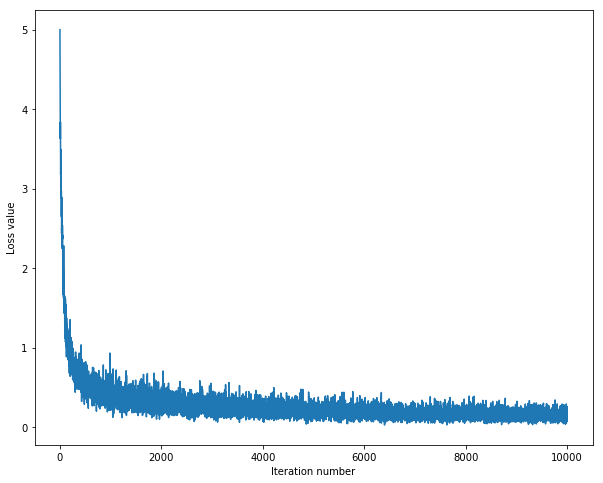

In [50]:
#do not kernelise and retrain the model, the test data accuracy increase 20%

svm.theta = np.zeros((X.shape[1],))

loss_hist = svm.train(X,yy,learning_rate=best_learning_rate-0.008,reg=C,num_iters=10000,verbose=True)

#if the learning_rate decrease, the num_iters must increase. We get better performance after we do so. (98.9%->99.3%)
#However, the training test accuracy decrease to 99.325%, which may avoid overfitting.

# ac = np.mean(y_test == svm.predict(X_test))
ac_train = metrics.accuracy_score(yy, svm.predict(X))
ac = metrics.accuracy_score(yy_test,svm.predict(X_test))
print ac_train, ac
print best_sigma, best_C, best_learning_rate

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [46]:
##################################################################################
# ANALYSIS OF MODEL: Print the top 15 words that are predictive of spam and for  #
# ham. Hint: use the coefficient values of the learned model                     #
##################################################################################
words, inv_words = utils.get_vocab_dict()
print svm.theta.shape
index = np.argsort(svm.theta)[-15:]
print index
print "Top 15 predictors of spam are: "
for i in range(-1,-16,-1):
    print words[index[i]+1]

(1899,)
[ 478  791 1066  965 1263 1298 1088 1851  476  155 1795  738 1397 1190  297]
Top 15 predictors of spam are: 
click
our
remov
guarante
visit
basenumb
dollar
will
nbsp
price
pleas
lo
most
hour
dollarnumb
